In [3]:
library(SingleCellExperiment)
library(ggplot2)

In [2]:
## input files folder
mydir = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/input_files/DA_all_conditions/"

In [4]:
### Neuroseq 10x data
### DA - all conditions (D30, D52, D52ROT)
### meta-cells
sce = readRDS("/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_neuroseq/pseudocells_Danai/Pseudobulk_per_donor_DA_cells_all_conditions_Leiden_res34_sce.rds")

In [5]:
sce

class: SingleCellExperiment 
dim: 32738 8648 
metadata(0):
assays(1): counts
rownames(32738): ENSG00000243485 ENSG00000237613 ... ENSG00000215616
  ENSG00000215611
rowData names(0):
colnames(8648): iudw_1--cluster0 iudw_1--cluster1 ... rozh_4--cluster8
  rozh_4--cluster9
colData names(8): Condition celltype ... donor pseudocell
reducedDimNames(0):
spikeNames(0):
altExpNames(0):

In [6]:
## make sample mapping file
df = data.frame(genotype_individual_id = sce$donor_id,
                phenotype_sample_id = colnames(sce))
head(df,2)

genotype_individual_id,phenotype_sample_id
HPSI0714i-iudw_1,iudw_1--cluster0
HPSI0714i-iudw_1,iudw_1--cluster1


In [9]:
smf_filename = paste0(mydir,"sample_mapping_file.csv")
write.csv(df, smf_filename, quote = F, row.names = F)

In [10]:
## make phenotype file

In [11]:
counts(sce)[1:5,1:5]

5 x 5 sparse Matrix of class "dgCMatrix"
                iudw_1--cluster0 iudw_1--cluster1 iudw_1--cluster2
ENSG00000243485                .                .                .
ENSG00000237613                .                .                .
ENSG00000186092                .                .                .
ENSG00000238009                .                .                .
ENSG00000239945                .                .                .
                iudw_1--cluster3 iudw_1--cluster4
ENSG00000243485                .                .
ENSG00000237613                .                .
ENSG00000186092                .                .
ENSG00000238009                .                .
ENSG00000239945                .                .

In [13]:
df_pheno = as.data.frame(as.matrix(counts(sce)))
pheno_filename = paste0(mydir,"phenotype.csv")
write.csv(df_pheno, pheno_filename, quote = F)

In [14]:
df_pheno[1:5,1:5]

,iudw_1--cluster0,iudw_1--cluster1,iudw_1--cluster2,iudw_1--cluster3,iudw_1--cluster4
ENSG00000243485,0,0,0,0,0
ENSG00000237613,0,0,0,0,0
ENSG00000186092,0,0,0,0,0
ENSG00000238009,0,0,0,0,0
ENSG00000239945,0,0,0,0,0


In [15]:
## make env file (PCs)

In [16]:
logcounts(sce) = counts(sce)

Warning message in regularize.values(x, y, ties, missing(ties)):
“collapsing to unique 'x' values”

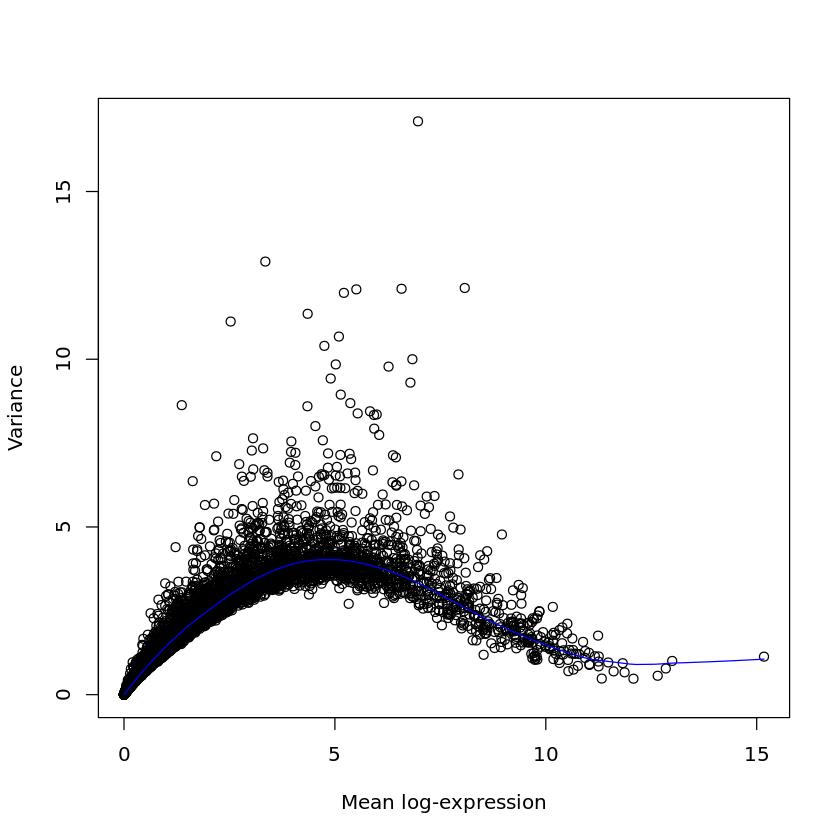

In [17]:
dec1 <- scran::modelGeneVar(sce)
plot(dec1$mean, dec1$total, xlab="Mean log-expression", ylab="Variance")
curve(metadata(dec1)$trend(x), col="blue", add=TRUE)

In [18]:
top.500.hvgs = rownames(dec1[order(dec1$bio, decreasing = TRUE),][1:500,])

In [22]:
pcs = prcomp(t(df_pheno[top.500.hvgs,]))
summary(pcs)

Importance of components:
                           PC1      PC2     PC3     PC4     PC5     PC6     PC7
Standard deviation     28.4590 13.59870 10.9659 8.75680 7.10078 6.47478 6.30718
Proportion of Variance  0.3368  0.07689  0.0500 0.03188 0.02096 0.01743 0.01654
Cumulative Proportion   0.3368  0.41365  0.4637 0.49553 0.51650 0.53393 0.55047
                           PC8     PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     5.62653 5.10885 4.81879 4.69412 4.39929 4.28723 4.17705
Proportion of Variance 0.01316 0.01085 0.00966 0.00916 0.00805 0.00764 0.00725
Cumulative Proportion  0.56363 0.57448 0.58414 0.59330 0.60135 0.60899 0.61624
                          PC15    PC16    PC17    PC18    PC19    PC20    PC21
Standard deviation     4.03966 3.85406 3.71748 3.51560 3.37658 3.21067 3.14431
Proportion of Variance 0.00679 0.00618 0.00575 0.00514 0.00474 0.00429 0.00411
Cumulative Proportion  0.62303 0.62921 0.63495 0.64009 0.64483 0.64912 0.65323
                      

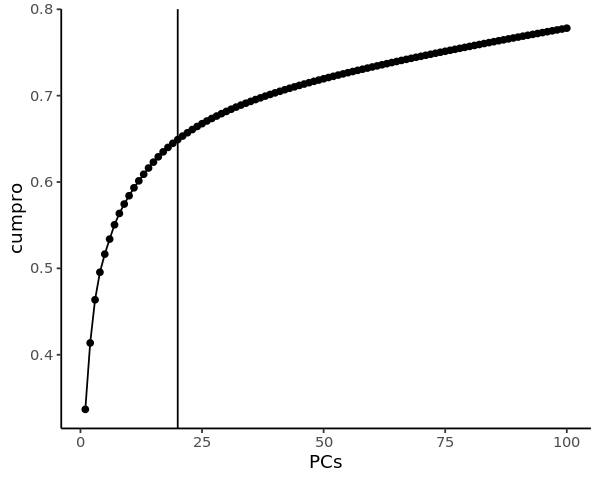

In [24]:
N = 100
x = 20
df0 = data.frame(PCs = 1:N,
                 cumpro = summary(pcs)$importance[3,1:N])
# head(df0)
options(repr.plot.width = 5, repr.plot.height = 4)
ggplot(df0, aes(x = PCs, y = cumpro)) + geom_point() + geom_line() + theme_classic() + 
    geom_vline(xintercept = x)

In [25]:
df_pca = pcs$x
df_pca[1:5,1:5]

,PC1,PC2,PC3,PC4,PC5
iudw_1--cluster0,-27.892954,17.043210,-2.125093,-4.9820948,-4.2731692
iudw_1--cluster1,-27.289486,-8.109854,-20.976738,0.4760808,0.1839452
iudw_1--cluster2,7.550699,21.747534,-4.979465,2.8939893,-2.0248518
iudw_1--cluster3,-28.336182,13.654708,-7.251557,-9.8241890,1.6129386
iudw_1--cluster4,-12.763183,21.592822,-4.033920,-5.9500223,-4.2150849


In [26]:
env_filename = paste0(mydir,"20PCs.csv")
write.csv(df_pca[,1:20], env_filename, quote = F)

In [27]:
## make feature-variant filter file

In [28]:
fvf_filename = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/eqtl/all_leads_5pct_FDR_Storey.csv"
df_fvf = read.csv(fvf_filename, row.names = 1)
head(df_fvf,2)

,snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,feature_end,n_samples,n_e_samples,...,snp_chromosome,snp_position,assessed_allele,call_rate,maf,hwe_p,feature_id,BH_fdr,q_value,label
2,11_107726716_A_C,4.544994e-05,0.09036565,0.02216001,0.0001665921,11,107661717,107799019,173,173,...,11,107726716,C,1,0.4306358,0.5386349,ENSG00000110660,0.001808781,0.00075681,FPP_D11
7,11_106001229_C_A,5.034677e-05,-0.24701335,0.06093060,0.0258019418,11,105946228,105969437,173,173,...,11,106001229,A,1,0.1213873,0.4744572,ENSG00000149313,0.116865230,0.04889743,FPP_D11


In [29]:
df_fvf_DA = df_fvf[grep("DA", df_fvf$label),]
nrow(df_fvf_DA)
head(df_fvf_DA,2)

[1] 2354

,snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,feature_end,n_samples,n_e_samples,...,snp_chromosome,snp_position,assessed_allele,call_rate,maf,hwe_p,feature_id,BH_fdr,q_value,label
9,9_36382790_A_G,3.841554e-09,0.2678636,0.04547094,1.059426e-04,9,36336393,36487545,165,165,...,9,36382790,G,1,0.2575758,0.4164226,ENSG00000137075,2.826764e-03,1.610653e-03,DA_D30
143,9_37422656_C_T,1.080706e-18,0.4319122,0.04893397,1.254483e-09,9,37422663,37436987,165,165,...,9,37422656,T,1,0.3606061,0.6138967,ENSG00000137106,1.482853e-07,8.449102e-08,DA_D30


In [30]:
unique(as.character(df_fvf_DA$label))

[1] "DA_D30"     "DA_D52"     "DA_D52_ROT"

In [31]:
DA_fvf = df_fvf_DA[,c("snp_id","feature_id")]
colnames(DA_fvf)[2] = "feature"
head(DA_fvf,2)

,snp_id,feature
9,9_36382790_A_G,ENSG00000137075
143,9_37422656_C_T,ENSG00000137106


In [32]:
fvf_filename = paste0(mydir,"DA_eqtl_allconditions_FDR5pct.csv")
write.csv(DA_fvf, fvf_filename, quote = F, row.names = F)